<a href="https://colab.research.google.com/github/Ryzon3/csci_6967/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset** (COPIED FROM HOMEWORK 1)

Note I have removed some of the EDA to not flood this notebook. Please let me know if I should not have.

For this homework I am going to use [Pumpkin seed dataset](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) from kaggle.

Citation: KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0

In [1]:
import kagglehub

# Login to kaggle
kagglehub.login()

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1


In [2]:
# Imports and some of following code referenced from: https://github.com/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TitanicExample.ipynb
# Downgrade SKLearn for an error with xgboost interface: https://stackoverflow.com/questions/79290968/super-object-has-no-attribute-sklearn-tags
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split`
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import Normalizer
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn import tree
warnings.filterwarnings("ignore")

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


## **Exploratory Data Analysis**

In [3]:
# Load dataset and preview with colab
df = pd.read_excel(path + '/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
# Starting EDA, by confirming feature count
df.shape

(2500, 13)

In [5]:
# Since they are all numerical it's very useful to check the stats of each feature, we can note they all vary in scale for later
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


We have absurdely high VIF! I am going to try to address this first by combining and removing some features. Unfortunately this is a very hard problem to address due to the nature of pumpkin seeds not having many features that don't correlate.

In [6]:
# Addressing the multicolinearlity by first dropping some features that are not needed as they are duplicates
new_df = df.drop(['Convex_Area', 'Equiv_Diameter', 'Eccentricity'], axis=1)

# Next we will combine some features that have high overlap
# First we will combine perimeter and area into a new measure called "size"
new_df['Size'] = new_df['Area'] + new_df['Perimeter']
new_df = new_df.drop(['Area', 'Perimeter'], axis=1)

# Next we combine roundness and compactness into "Dense"
new_df['Dense'] = new_df['Compactness'] + new_df['Roundness']
new_df = new_df.drop(['Compactness', 'Roundness'], axis=1)

# Lastly we rerun VIF to see if it improves
X = new_df.drop('Class', axis=1)
X.insert(0, 'Intercept', 1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame sorted by VIF
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
1,Major_Axis_Length,298.466651
6,Size,268.839032
5,Aspect_Ration,108.953211
2,Minor_Axis_Length,87.112754
7,Dense,43.371124
3,Solidity,1.794967
4,Extent,1.148827


In [7]:
# Now we can move on to make the data usable for the next question

# independent variables
X = new_df.drop(['Class'], axis=1)
# Convert Y categorical to 0 and 1 then print which one is 1 and 0
classes = new_df['Class'].unique()
class_mapping = {classes[0]: 0, classes[1]: 1}
print("Class mapping:", class_mapping)

# Apply the mapping
new_df['class_num'] = new_df['Class'].map(class_mapping)
# dependent/target variable
y = new_df.class_num
# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Class mapping: {'Çerçevelik': 0, 'Ürgüp Sivrisi': 1}


## **Task 1: Decision Tree Classifier**

In [8]:
# Initial Test and implementation of Decision Tree Classifier before we start part 1
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.804


Initial with no parameter setting is pretty nice accuracy. This is already performing on par with our logistic regression tests from last homework. Now we will start part 1 and test and visualize 3 different parameter settings.

In [19]:
# First let's train three Trees
clf5 = DecisionTreeClassifier(max_depth=5)
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
print("Accuracy max_depth=5:", accuracy_score(y_test, y_pred))
clf10 = DecisionTreeClassifier(max_depth=10)
clf10.fit(X_train, y_train)
y_pred = clf10.predict(X_test)
print("Accuracy max_depth=10:", accuracy_score(y_test, y_pred))
clfNone = DecisionTreeClassifier(max_depth=None)
clfNone.fit(X_train, y_train)
y_pred = clfNone.predict(X_test)
print("Accuracy max_depth=None:", accuracy_score(y_test, y_pred))

Accuracy max_depth=5: 0.836
Accuracy max_depth=10: 0.838
Accuracy max_depth=None: 0.806


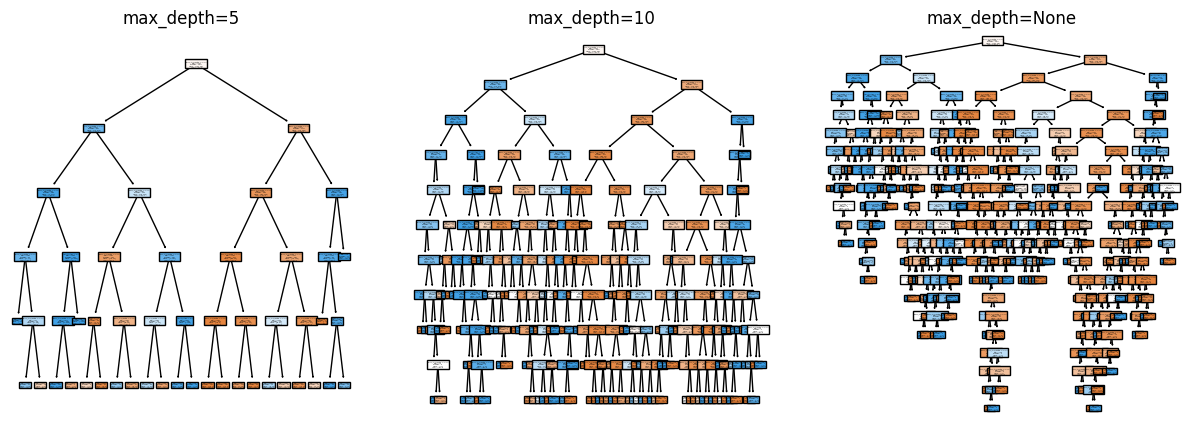

In [10]:
# Now let's plot each tree side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
tree.plot_tree(clf5, ax=axs[0], feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
tree.plot_tree(clf10, ax=axs[1], feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
tree.plot_tree(clfNone, ax=axs[2], feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
axs[0].set_title("max_depth=5")
axs[1].set_title("max_depth=10")
axs[2].set_title("max_depth=None")
plt.show()


Looking at this we can notice that changing the max_depth of a decision tree has very important effects. The first thing we can notice is how interpretable a lower max_depth is, at a max_depth of 5 we could likely resolve this tree by hand. On the other hand when max_depth is not limited the tree becomes overly complex and likely is overfitting to the training data. We can see that the overfitting statement is likely true since the max_deoth of 5 has the best accuracy on the test set.

Moving onto the next part, sensitivity analysis put simply is the testing of a models sensitivity to small variations in inputs. To test this you can manually vary inputs by small amounts on specific featues to see how much this changes the model output.

Sources: [The Sensitivity Analysis: A Powerful Yet Underused Tool for Data Scientists](https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976), [Understand Your Black Box Model Using Sensitivity Analysis — Practical Guide](https://medium.com/@einat_93627/understand-your-black-box-model-using-sensitivity-analysis-practical-guide-ef6ac4175e55), [What is sensitivity analysis and how can you use it to evaluate your model?](https://www.linkedin.com/advice/3/what-sensitivity-analysis-how-can-you-use-evaluate)

In [11]:
# I looked into sensitivity analysis with SKLearn models, the best package I found was https://scikit-learn.org/1.5/modules/generated/sklearn.inspection.permutation_importance.html
# I will be using this then doing trying manual sensitivty analysis as well

# Note I am using clf5 since it gave the best results above
pi = permutation_importance(clf5, X_test, y_test, n_repeats=30)

In [12]:
# Assemble a datafram for importance, for easier viewing
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': pi.importances_mean,
    'importance_std': pi.importances_std
})
importance_df = importance_df.sort_values(by='importance_mean', ascending=False)

importance_df

,feature,importance_mean,importance_std
1,Minor_Axis_Length,0.243667,0.017367
0,Major_Axis_Length,0.171600,0.019144
4,Aspect_Ration,0.045867,0.004759
2,Solidity,0.000000,0.000000
3,Extent,0.000000,0.000000
5,Size,0.000000,0.000000
6,Dense,0.000000,0.000000


In [13]:
# Let's take a closer look at Minor_Axis_Lenght and Aspect_Ration features since these results were very surprsing
# They correspond to the 0th and 4th feature in the input
X_test_permuted = X_test.copy()
# Randomly shuffle the values to check how sensitive the input is to the desired output
X_test_permuted[:, 0] = np.random.permutation(X_test[:, 0])
# Now test with that permutation
y_pred_permuted = clf5.predict(X_test_permuted)
y_pred_orig = clf5.predict(X_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred_orig))
print("Accuracy with Minor_Axis_Lenght permuted:", accuracy_score(y_test, y_pred_permuted))
X_test_permuted = X_test.copy()
X_test_permuted[:, 4] = np.random.permutation(X_test[:, 4])
y_pred_permuted = clf5.predict(X_test_permuted)
print("Accuracy with Aspect_Ration permuted:", accuracy_score(y_test, y_pred_permuted))

Initial Accuracy: 0.838
Accuracy with Minor_Axis_Lenght permuted: 0.654
Accuracy with Aspect_Ration permuted: 0.796


We can see that the model is pretty sensitive to both features. Minor_Axis_Length seems to be less sensitive for the model however. Fortunately the model doesn't fail even with these varying permutations and still predicts above the mean. This means thtat the model's decision boundary isn't too strict on any one feature.

## Task 2: Bagging and boosting
For this task I am going to use SKlearns bagging classifier and XGBoost classifier for boosting.

In [14]:
folds = [5, 10, 15]

for fold in folds:
    # initialize bagging and xgboost models
    clf_bag = BaggingClassifier()
    clf_xgb = XGBClassifier()
    # Fit models with stratified k-fold cross-validation, using accuracy, f1 score, precision
    cv_output_bag = cross_validate(clf_bag, X, y, cv=StratifiedKFold(n_splits=fold), scoring=['accuracy', 'f1', 'precision'])
    cv_output_xgb = cross_validate(clf_xgb, X, y, cv=StratifiedKFold(n_splits=fold), scoring=['accuracy', 'f1', 'precision'])
    # print the scores for each
    print("Fold:", fold)
    print("Bagging Classifier:")
    print("Accuracy:", cv_output_bag['test_accuracy'].mean())
    print("F1 Score:", cv_output_bag['test_f1'].mean())
    print("Precision:", cv_output_bag['test_precision'].mean())
    print("XGBoost Classifier:")
    print("Accuracy:", cv_output_xgb['test_accuracy'].mean())
    print("F1 Score:", cv_output_xgb['test_f1'].mean())
    print("Precision:", cv_output_xgb['test_precision'].mean())
    print()

Fold: 5
Bagging Classifier:
Accuracy: 0.8780000000000001
F1 Score: 0.8691473544432371
Precision: 0.8948444774497994
XGBoost Classifier:
Accuracy: 0.8775999999999999
F1 Score: 0.8696701576272561
Precision: 0.8870030852183518

Fold: 10
Bagging Classifier:
Accuracy: 0.8792
F1 Score: 0.8699155458468197
Precision: 0.8984433672859977
XGBoost Classifier:
Accuracy: 0.8808
F1 Score: 0.8729720124236863
Precision: 0.8905289999549086

Fold: 15
Bagging Classifier:
Accuracy: 0.8759685448380347
F1 Score: 0.8665721312950567
Precision: 0.8938695325182182
XGBoost Classifier:
Accuracy: 0.8751268547242863
F1 Score: 0.8657611546097269
Precision: 0.8901243364056555



Interpreting these results may seem tricky so we will go bit by bit. First looking at accuracy and precision the bagging classifier is better for every fold even if only marginally. On the other hand looking at f1-score xgboost leads the way in one fold but the rest are very close. Overall the metrics do not tell us a huge story, they are very similar for both ensemble methods and show the power of such methods. I would struggle to even choose which model is better meanng that the performance does not seem to change based on the metric. One last interesting note is that the models seem to perform the best with 10 folds.

## **Task 3: Comparison**

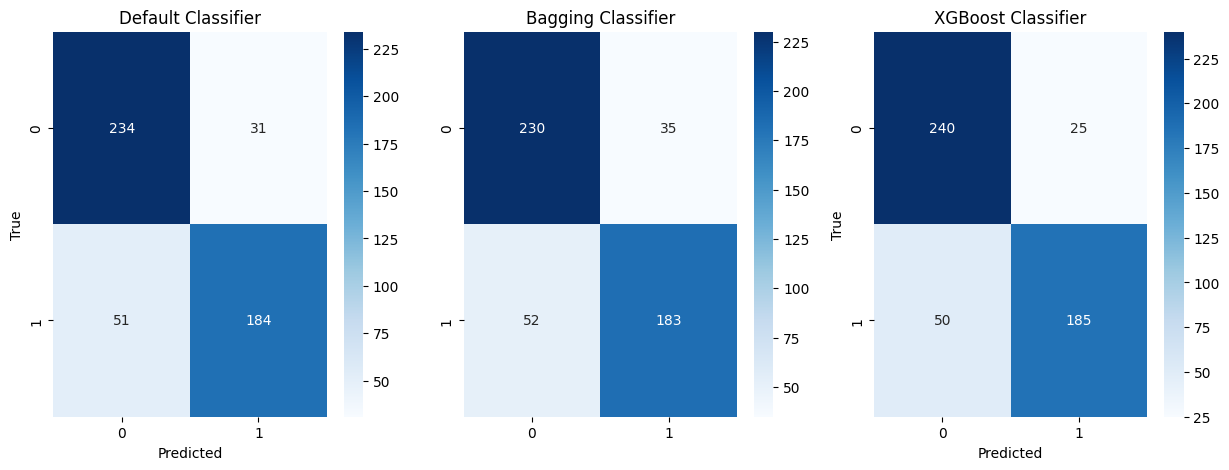

In [20]:
# Get the best models with 10 folds
clf_bag = BaggingClassifier()
clf_xgb = XGBClassifier()
clf5 = DecisionTreeClassifier(max_depth=5)
cv_output_bag = cross_validate(clf_bag, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring=['accuracy', 'f1', 'precision'], return_estimator=True)
cv_output_xgb = cross_validate(clf_xgb, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring=['accuracy', 'f1', 'precision'], return_estimator=True)
cv_output_def = cross_validate(clf5, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring=['accuracy', 'f1', 'precision'], return_estimator=True)
clf_bag_cv = cv_output_bag['estimator'][np.argmax(cv_output_bag['test_accuracy'])]
clf_xgb_cv = cv_output_xgb['estimator'][np.argmax(cv_output_xgb['test_accuracy'])]
clf_def_cv = cv_output_def['estimator'][np.argmax(cv_output_def['test_accuracy'])]

# Create a confusion matrix on the test set for both models
y_pred_bag = clf_bag_cv.predict(X_test)
y_pred_xgb = clf_xgb_cv.predict(X_test)
y_pred_def = clf_def_cv.predict(X_test)
cm_bag = confusion_matrix(y_test, y_pred_bag)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_def = confusion_matrix(y_test, y_pred_def)

# Display all side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(cm_def, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Default Classifier')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Bagging Classifier')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title('XGBoost Classifier')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
plt.show()


In [22]:
# Now perform paired t-test to see if difference in models is signifcant
from scipy.stats import ttest_rel

# Find statistics for each model first
def_acc = accuracy_score(y_test, y_pred_def)
def_f1 = f1_score(y_test, y_pred_def)
def_prec = precision_score(y_test, y_pred_def)
def_stats = [def_acc, def_f1, def_prec]
bag_acc = accuracy_score(y_test, y_pred_bag)
bag_f1 = f1_score(y_test, y_pred_bag)
bag_prec = precision_score(y_test, y_pred_bag)
bag_stats = [bag_acc, bag_f1, bag_prec]
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_prec = precision_score(y_test, y_pred_xgb)
xgb_stats = [xgb_acc, xgb_f1, xgb_prec]

# Now perform t-test
print("Default Classifier vs Bagging Classifier:", ttest_rel(def_stats, bag_stats))
print("Default Classifier vs XGBoost Classifier:", ttest_rel(def_stats, xgb_stats))
print("Bagging Classifier vs XGBoost Classifier:", ttest_rel(bag_stats, xgb_stats))

Default Classifier vs Bagging Classifier: TtestResult(statistic=5.611046576667683, pvalue=0.030324950898054776, df=2)
Default Classifier vs XGBoost Classifier: TtestResult(statistic=-4.674322446411354, pvalue=0.042847941879873085, df=2)
Bagging Classifier vs XGBoost Classifier: TtestResult(statistic=-5.014728370641648, pvalue=0.03754044609163734, df=2)


Based on the results of the t-test the models exibhit significant differences, since the p-values are less than 0.05.\
\
A Decision Tree Classifier effectively captures complex data relationships with low bias but tends to overfit, resulting in high variance. The Bagging Classifier addresses this by averaging multiple Decision Trees trained on different data subsets, maintaining low bias while significantly reducing variance for more stable predictions. XGBoost further optimizes this balance by sequentially building trees that correct previous errors and applying regularization techniques to control variance and prevent overfitting. Together, these ensemble methods illustrate how combining models can efficiently manage the bias-variance trade-off, enhancing both the robustness and accuracy of machine learning outcomes.

## **Task 4 (6000 level): XGBoost**

In [38]:
# It's time to perform a grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

xgb_clf = XGBClassifier()

search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

results = pd.DataFrame(search.cv_results_)

results = results.drop(['params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
                        'split3_test_score', 'split4_test_score', 'mean_fit_time', 'std_fit_time', 'std_score_time', 'mean_score_time'], axis=1)
results = results.sort_values(by='mean_test_score', ascending=False)

print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)
results

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}
Best score: 0.889


,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,rank_test_score
17,0.05,3,0.8,0.8890,0.021541,1
35,0.1,3,1.0,0.8870,0.023152,2
8,0.01,7,0.7,0.8865,0.020469,3
16,0.05,3,0.7,0.8865,0.020100,3
18,0.05,3,0.9,0.8845,0.022102,5
...,...,...,...,...,...,...
58,0.2,7,0.9,0.8655,0.025758,60
62,0.2,9,0.9,0.8640,0.023906,61
59,0.2,7,1.0,0.8635,0.017073,62
61,0.2,9,0.8,0.8625,0.023927,63


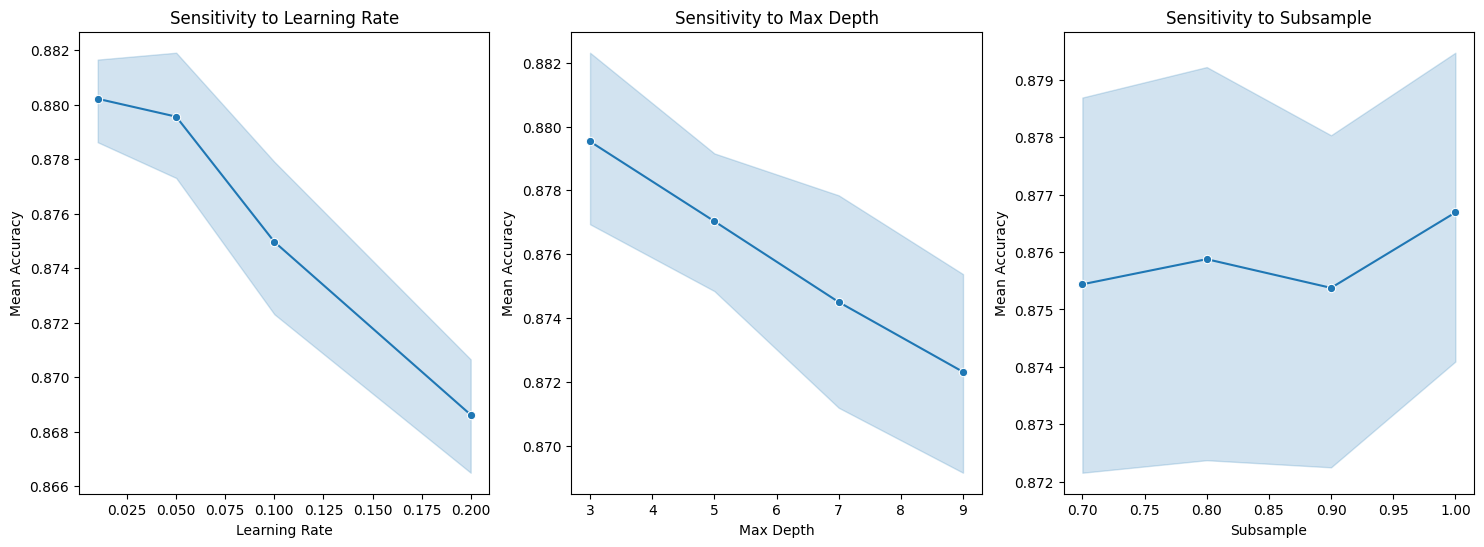

In [39]:

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.lineplot(x='param_learning_rate', y='mean_test_score', data=results, marker='o')
plt.title('Sensitivity to Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')

# Max Depth Sensitivity
plt.subplot(1,3,2)
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results, marker='o')
plt.title('Sensitivity to Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')

# Subsample Sensitivity
plt.subplot(1,3,3)
sns.lineplot(x='param_subsample', y='mean_test_score', data=results, marker='o')
plt.title('Sensitivity to Subsample')
plt.xlabel('Subsample')
plt.ylabel('Mean Accuracy')

plt.show()

The sensitivity analysis shows that learning rate and max depth significantly impact accuracy, while subsample has a smaller effect. Lower learning rates yield higher accuracy, while increasing it reduces performance and increases variance. Similarly, lower max depth which tends to generalize better has higher test accuracy than higher. Subsample values show minor fluctuations and doesn't seem to be that sensative. Overall, fine-tuning learning rate and max depth is crucial, while subsample adjustments have a smaller impact.